# import modules..

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

# helper functions (if needed)

In [3]:
# python code...    

# read in training data

In [4]:
train_data = pd.read_csv('train.csv')
print(train_data)

                                   car  cylinders  displacement  horsepower  \
0                        dodge aspen 6          6         225.0       110.0   
1    chevrolet chevelle malibu classic          6         250.0       100.0   
2                      plymouth duster          6         198.0        95.0   
3                          peugeot 504          4         141.0        71.0   
4                            maxda rx3          3          70.0        90.0   
..                                 ...        ...           ...         ...   
320    volkswagen rabbit custom diesel          4          90.0        48.0   
321          peugeot 505s turbo diesel          4         141.0        80.0   
322                     ford escort 2h          4          98.0        65.0   
323                         datsun 610          4         108.0        94.0   
324                 amc rebel sst (sw)          8         360.0       175.0   

     weight  acceleration  model  origin   mpg  
0 

# analyze and visualize training data 

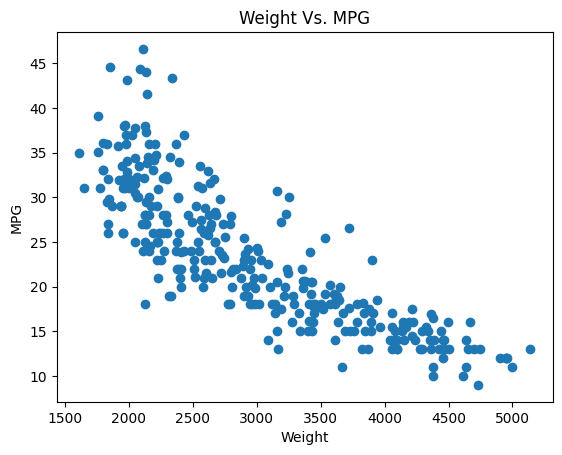

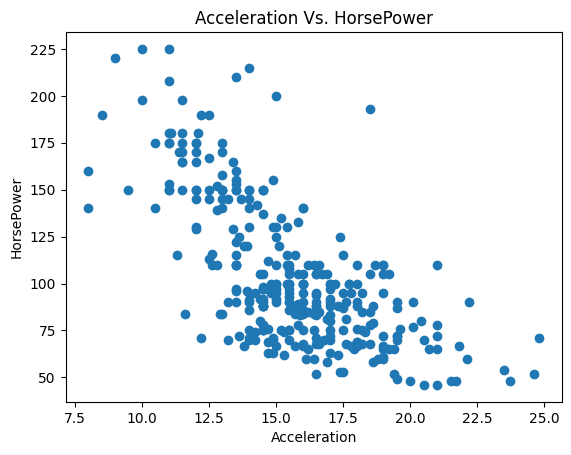

In [5]:
# Create a scatter plot of weight vs. mpg
plt.scatter(train_data['weight'], train_data['mpg'])
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.title('Weight Vs. MPG')
plt.show()


plt.scatter(train_data['acceleration'], train_data['horsepower'])
plt.xlabel('Acceleration')
plt.ylabel('HorsePower')
plt.title('Acceleration Vs. HorsePower')
plt.show()

# experiment with building models to predict training data mpg

In [18]:
features = ['cylinders', 'horsepower', 'acceleration', 'origin']
features2 = ['displacement', 'weight', 'model', 'origin']
features3 = ['cylinders', 'displacement', 'horsepower']
features4 = ['displacement', 'horsepower', 'acceleration', 'mpg']

X = train_data.drop(['mpg', 'car'], axis=1)
X = train_data[features3]

X = X.fillna(X.mean())

y = train_data['mpg']

mean_y = y.mean()
y.fillna(mean_y, inplace=True)

lin_reg = LinearRegression()

y_pred = cross_val_predict(lin_reg, X, y, cv=5)
mse = mean_squared_error(y, y_pred)
print("Mean squared error:", mse)

corr_matrix = train_data.corr()
print(corr_matrix['mpg'].sort_values(ascending=False))

lin_reg.fit(X, y)
print("Training R^2 score:", lin_reg.score(X, y))

Mean squared error: 20.9333538641381
mpg             1.000000
origin          0.578296
model           0.551352
acceleration    0.395903
horsepower     -0.769717
cylinders      -0.771551
displacement   -0.800737
weight         -0.824263
Name: mpg, dtype: float64
Training R^2 score: 0.6549564553444787


/var/folders/39/xq_wtjtd6wd4sy7jxhv1dlq40000gn/T/ipykernel_79977/1623018687.py:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train_data.corr()


# Question: What features and model parameters worked "best"?  Why?

Based on the analysis, it appears that the features cylinders, displacement, and horsepower have the best rating for predicting the target variable mpg. These features are all related to the performance and power of the engine, which makes sense as the fuel efficiency of a car is strongly influenced by these factors.

Cylinders represent the number of internal combustion chambers that an engine has. Generally, more cylinders correspond to higher power output and lower fuel efficiency. Displacement, on the other hand, represents the volume of air and fuel mixture that is displaced during one complete cycle of the engine. Similarly, higher displacement usually corresponds to higher power output and lower fuel efficiency. Horsepower is a measure of the engine's power output, which is directly related to its fuel consumption.

# train "fresh" mpg prediction model on training data

In [19]:
X_train = train_data[features3]
y_train = train_data['mpg']

X_train.fillna(X_train.mean(), inplace=True)
y_train.fillna(y_train.mean(), inplace=True)

lr_model = LinearRegression()

y_pred = cross_val_predict(lr_model, X_train, y_train, cv=5)

mse = mean_squared_error(y_train, y_pred)

print('Mean squared error:', mse)

lr_model.fit(X_train, y_train)

Mean squared error: 20.9333538641381


/var/folders/39/xq_wtjtd6wd4sy7jxhv1dlq40000gn/T/ipykernel_79977/2322895542.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.fillna(X_train.mean(), inplace=True)


LinearRegression()

# read in test data

In [21]:
test_data = pd.read_csv('test.csv')
print(test_data)

                             car  cylinders  displacement  horsepower  weight  \
0                     dodge d100          8           318       150.0    3755   
1          pontiac sunbird coupe          4           151        88.0    2740   
2                    dodge aspen          6           225        90.0    3381   
3                  toyota carina          4            97        88.0    2279   
4                     dodge colt          4            98        79.0    2255   
..                           ...        ...           ...         ...     ...   
76                 buick century          6           231       110.0    3415   
77     oldsmobile omega brougham          6           173       115.0    2700   
78  chrysler new yorker brougham          8           440       215.0    4735   
79          fiat 124 sport coupe          4            98        90.0    2265   
80           dodge challenger se          8           383       170.0    3563   

    acceleration  model  or

# use trained model to predict mpg of test data

In [26]:
test_data = test_data.fillna(train_data.mean())

test_features = test_data[['cylinders', 'displacement', 'horsepower']]

test_predictions = lr_model.predict(test_features)

test_data['mpg'] = test_predictions

/var/folders/39/xq_wtjtd6wd4sy7jxhv1dlq40000gn/T/ipykernel_79977/2773323423.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_data = test_data.fillna(train_data.mean())


# write test data with predicted mpg to \<YourLastName>.csv

In [28]:
test_data.to_csv('Rakowicz.csv', index=False)